In [1]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, ReLU
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import tensorflow as tf
import keras_metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import random
from keras import models
import keras.backend as K
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras import backend as K
import h5py
from keras.optimizers import SGD
import cv2

import numpy as np
import cv2
import matplotlib.pyplot as plt
from time import time
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [5]:
x_train=np.load('../q1_data/x_train.npy')
y_train=np.load('../q1_data/y_train.npy')
x_test=np.load('../q1_data/x_test.npy')
y_test=np.load('../q1_data/y_test.npy')


batch_size = 128
num_classes = 96
epochs = 5
train_example=int(x_train.shape[0]/1)
test_example=int(x_test.shape[0]/1)

# input image dimensions
# img_rows, img_cols = 28, 28
image_rows, image_columns = 28, 28


y_test1=y_test[0:test_example]
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_size = x_train.shape[0]
x_test_size = x_test.shape[0]

# x_train = x_train.reshape(x_train_size,28*28*3)
# x_test = x_test.reshape(x_test_size,28*28*3)

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

print(y_train.shape, 'train samples')
print(y_test.shape, 'test samples')


# convert class vectors to binary class matrices (hot encoding)
y_train_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_hot = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train_size)
print('y_train shape:', x_test_size)
# print('x_test shape:', x_test.shape)
# print('y_test_hot shape:', y_test.shape)

print(y_train[0], 'train samples')
print(y_test[0], 'test samples')


(57600, 28, 28, 3) train samples
(38400, 28, 28, 3) test samples
(57600,) train samples
(38400,) test samples
x_train shape: 57600
y_train shape: 38400
0 train samples
0 test samples


In [6]:
# Create a model with the above specified network architecture. Use the Adam optimizer
# with categorical crossentropy loss. Once the model is trained test it using the test data.

model = Sequential()
# 1. 7x7 Convolutional Layer with 32 filters and stride of 1.
model.add(Conv2D(32, kernel_size=(7, 7), strides=(1, 1), input_shape=(28,28,3),padding="same"))
# 2. ReLU Activation Layer.
model.add(ReLU())
# 3. Batch Normalization Layer
model.add(BatchNormalization())
# 4. 2x2 Max Pooling layer with a stride of 2
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
# 5. fully connected layer with 1024 output units.
model.add(Flatten())

model.add(Dense(1024))
# # 6. ReLU Activation Layer.
model.add(ReLU())
# # final layer with output neurons same as no. of classes
model.add(Dense(num_classes, activation='softmax'))



# [,keras_metrics.precision(), keras_metrics.recall(), keras_metrics.f1_score()]
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train[0:train_example], y_train_hot[0:train_example],
		  batch_size=batch_size,
		  epochs=1,
		  verbose=1)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
57600/57600 [==============================] - 201s 3ms/step - loss: 1.7014 - acc: 0.6324


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4736      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
re_lu_2 (ReLU)               (None, 1024)              0         
__________

In [4]:
num_classes=10
epochs=1
batch_size=128
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

print(x_train.shape)
model = Sequential()
# 1. 7x7 Convolutional Layer with 32 filters and stride of 1.
model.add(Conv2D(32, kernel_size=(7, 7), strides=(1, 1), input_shape=(28,28,1)))
# 2. ReLU Activation Layer.
model.add(ReLU())
# 3. Batch Normalization Layer
model.add(BatchNormalization())
# 4. 2x2 Max Pooling layer with a stride of 2
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
# 5. fully connected layer with 1024 output units.
model.add(Dense(1024))
# 6. ReLU Activation Layer.
model.add(ReLU())
# final layer with output neurons same as no. of classes
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# [,keras_metrics.precision(), keras_metrics.recall(), keras_metrics.f1_score()]
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=1)



(60000, 28, 28, 1)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 11, 11, 1024)      33792     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 11, 11, 1024)      0         
___________________________________________________

In [2]:
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [3]:
def generate_pattern(layer_name, filter_index, size=150):
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3))* 20 + 128. 
    step = 1.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [4]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

x_train=np.load('../q1_data/x_train.npy')
y_train=np.load('../q1_data/y_train.npy')
y_train_length = np.load('../q1_data/y_train_length.npy')
y_train_width=np.load('../q1_data/y_train_width.npy')
y_train_angle = np.load('../q1_data/y_train_angle.npy')
y_train_color = np.load('../q1_data/y_train_color.npy')
x_test=np.load('../q1_data/x_test.npy')
y_test=np.load('../q1_data/y_test.npy')
y_test_length = np.load('../q1_data/y_test_length.npy')
y_test_width = np.load('../q1_data/y_test_width.npy')
y_test_angle = np.load('../q1_data/y_test_angle.npy')
y_test_color = np.load('../q1_data/y_test_color.npy')


batch_size = 128
num_classes = 96
epochs = 5
train_example=int(x_train.shape[0]/1)
test_example=int(x_test.shape[0]/1)

# input image dimensions
image_rows, image_columns = 28, 28
image_size = 28*28*3


y_test1=y_test[0:test_example]

x_train_size = x_train.shape[0]
x_test_size = x_test.shape[0]


print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
print(y_train.shape, 'train samples')
print(y_test.shape, 'test samples')

print(len(y_train_angle))


# convert class labels to hot encoding vectors
y_train_hot = keras.utils.to_categorical(y_train, num_classes)
y_train_length_hot = keras.utils.to_categorical(y_train_length, 2)
y_train_width_hot = keras.utils.to_categorical(y_train_width, 2)
y_train_angle_hot = keras.utils.to_categorical(y_train_angle, 12)
y_train_color_hot = keras.utils.to_categorical(y_train_color, 2)

y_test_hot = keras.utils.to_categorical(y_test, num_classes)
y_test_length_hot = keras.utils.to_categorical(y_test_length, 2)
y_test_width_hot = keras.utils.to_categorical(y_test_width, 2)
y_test_angle_hot = keras.utils.to_categorical(y_test_angle, 12)
y_test_color_hot = keras.utils.to_categorical(y_test_color, 2)



# network structure
input = Input(shape=(28,28,3))

h1 = Conv2D(32, kernel_size=(7, 7), strides=(1, 1))(input)
h1 = ReLU()(h1)
h1 = BatchNormalization()(h1)
h1 = MaxPooling2D(pool_size=(2, 2),strides=(2, 2))(h1)



thread_1 = Flatten()(h1)
thread_1 = Dense(1024)(thread_1)
thread_1 = ReLU()(thread_1)
width_output = Dense(2, activation='sigmoid')(thread_1)

thread_2 = Flatten()(h1)
thread_2 = Dense(1024)(thread_2)
thread_2	 = ReLU()(thread_2)
color_output = Dense(2, activation='sigmoid')(thread_2)

thread_3 = Flatten()(h1)
thread_3 = Dense(1024)(thread_3)
thread_3 = ReLU()(thread_3)
length_output = Dense(2, activation='sigmoid')(thread_3)

thread_4 = Flatten()(h1)
thread_4 = Dense(1024)(thread_4)
thread_4 = ReLU()(thread_4)
angle_output = Dense(12, activation='softmax')(thread_4)

layer_width = 'dense_2'
layer_color = 'dense_4'
layer_length = 'dense_6'
layer_angle = 'dense_8'

losses = {
	layer_width: 'binary_crossentropy',
	layer_color: 'binary_crossentropy',
	layer_length: 'binary_crossentropy'
	,
	layer_angle: 'categorical_crossentropy'
}
metrics = {
	layer_width: 'accuracy',
	layer_color: 'accuracy',
	layer_length: 'accuracy'
	,
	layer_angle: 'accuracy'
}
lossWeights = {layer_width: 0.1, layer_color: 0.1, layer_length: 0.1, layer_angle: 0.6}

outputs=[width_output,color_output,length_output,angle_output]
X_test=x_test[0:test_example]
Y_train=[y_train_width_hot[0:train_example],y_train_color_hot[0:train_example],y_train_length_hot[0:train_example],y_train_angle_hot[0:train_example]]
Y_test=[y_test_width_hot[0:test_example],y_test_color_hot[0:test_example],y_test_length_hot[0:test_example],y_test_angle_hot[0:test_example]]

Y_test1={
	layer_width: y_test_width_hot[0:test_example],
	layer_color: y_test_color_hot[0:test_example],
	layer_length: y_test_length_hot[0:test_example]
	,
	layer_angle: y_test_angle_hot[0:test_example]
}

model = Model(inputs=input, outputs=outputs)
model.summary()
model.compile(loss=losses,loss_weights=lossWeights,optimizer=keras.optimizers.Adam(),metrics=metrics)
history = model.fit(x_train[0:train_example], y=Y_train,batch_size=batch_size,epochs=1,verbose=1,validation_data=(X_test,Y_test1),callbacks=[tbCallBack])

(57600, 28, 28, 3) train samples
(38400, 28, 28, 3) test samples
(57600,) train samples
(38400,) test samples
57600
Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 22, 22, 32)   4736        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 22, 22, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_

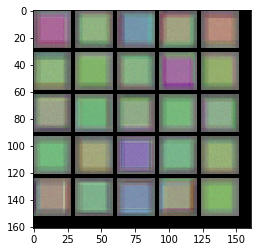

In [5]:
layer_name = 'conv2d_1'
size = 28
margin = 3
results = np.zeros((5 * size + 7 * margin, 5 * size + 7 * margin,3))

for i in range(5):
    for j in range(5):
        filter_img = generate_pattern(layer_name, i + (j*5), size=size)
        #print(filter_img.shape)
        #filter_img=filter_img.reshape((28,28))
        plt.imshow(filter_img)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end] = filter_img
        
plt.imshow(results)
plt.savefig("Section2Lines")